### ***Import All Required Libraries***  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ***Load Train and Test Data***  

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

### ***Feature Reasoning***  
- In real estate location is one of the most import features that predict the price of the home  
- Since we are not picky on the type of real estate we buy, we mainly only look at location.  
- Once we know the locations of the property then we focus on features of the house that the people will notice/use the most, such as the living room, garage, basement etc.
- The location for a house is crucial for our buying and selling strategy so knowing how the neighborhood impacts price is very important.   

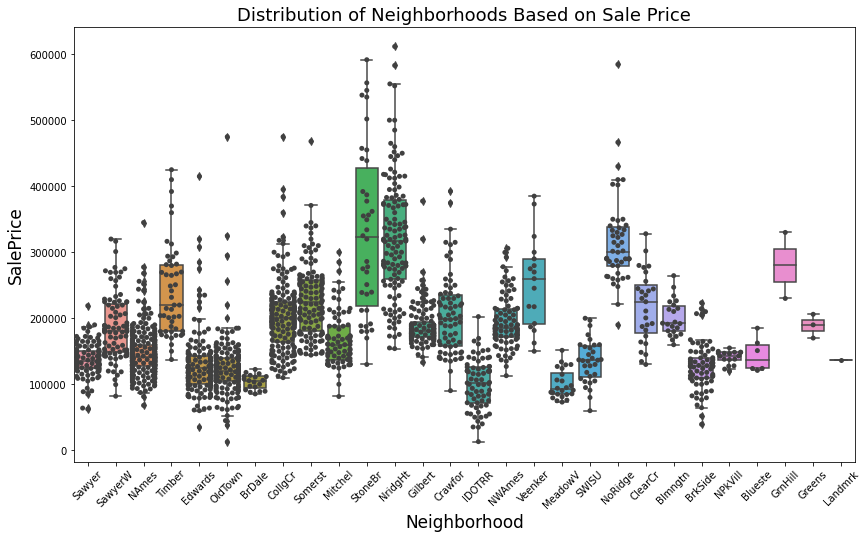

In [3]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Neighborhood', y="SalePrice", data=train_df);
sns.swarmplot(x="Neighborhood", y="SalePrice", data=train_df, color=".25")
plt.xticks(rotation=45);
plt.xlabel('Neighborhood', size=17)
plt.ylabel('SalePrice', size=17)
plt.title('Distribution of Neighborhoods Based on Sale Price', size=18);

In [4]:
def clean_noms(train, test):
    # MOVING ONTO **CATEGORICAL** FEATURES
    # Get dummies for the neighborhood column for TRAIN
    train_dummies = train[['Id','Neighborhood']]
    train_new = pd.get_dummies(columns=['Neighborhood'], data=train_dummies, drop_first=True)
    
    # Get dummies for the neighborhood column for TEST
    test_dummies = test[['Id','Neighborhood']]
    test_new = pd.get_dummies(columns=['Neighborhood'], data=test_dummies, drop_first=True)
    
    # This finds the columns that are not the same
    # https://stackoverflow.com/questions/35713093/how-can-i-compare-two-lists-in-python-and-return-not-matches/35713174
    new_list = [list(set(train_new.columns[1:]).difference(test_new.columns[1:]))]
    
    # This drops the columns that are not the same in the train and test datasets
    train_new.drop(columns=[[n for n in new_list][0][0], [n for n in new_list][0][1]], inplace=True)
    
    return train_new.corr()

In [5]:
clean_noms(train_df, test_df)

,Id,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,1.000000,-0.027863,-0.029336,-0.009280,0.021445,0.094991,0.074046,0.056410,-0.070485,0.011021,...,-0.012925,-0.079572,-0.001695,0.029677,0.015220,-0.074444,-0.052401,-0.012102,0.033786,0.015350
Neighborhood_Blueste,-0.027863,1.000000,-0.005238,-0.010626,-0.006256,-0.016801,-0.010257,-0.014829,-0.013262,-0.002073,...,-0.008385,-0.013622,-0.015916,-0.006819,-0.012957,-0.011400,-0.014091,-0.007442,-0.008385,-0.004952
Neighborhood_BrDale,-0.029336,-0.005238,1.000000,-0.018969,-0.011168,-0.029993,-0.018311,-0.026472,-0.023676,-0.003701,...,-0.014969,-0.024318,-0.028412,-0.012174,-0.023130,-0.020352,-0.025155,-0.013286,-0.014969,-0.008840
Neighborhood_BrkSide,-0.009280,-0.010626,-0.018969,1.000000,-0.022657,-0.060845,-0.037147,-0.053703,-0.048030,-0.007508,...,-0.030367,-0.049333,-0.057639,-0.024696,-0.046923,-0.041287,-0.051031,-0.026952,-0.030367,-0.017934
Neighborhood_ClearCr,0.021445,-0.006256,-0.011168,-0.022657,1.000000,-0.035824,-0.021871,-0.031620,-0.028279,-0.004421,...,-0.017880,-0.029046,-0.033937,-0.014541,-0.027627,-0.024309,-0.030046,-0.015869,-0.017880,-0.010559
Neighborhood_CollgCr,0.094991,-0.016801,-0.029993,-0.060845,-0.035824,1.000000,-0.058735,-0.084914,-0.075943,-0.011871,...,-0.048015,-0.078003,-0.091136,-0.039049,-0.074192,-0.065281,-0.080688,-0.042616,-0.048015,-0.028356
Neighborhood_Crawfor,0.074046,-0.010257,-0.018311,-0.037147,-0.021871,-0.058735,1.000000,-0.051841,-0.046364,-0.007248,...,-0.029314,-0.047622,-0.055640,-0.023840,-0.045296,-0.039855,-0.049261,-0.026018,-0.029314,-0.017312
Neighborhood_Edwards,0.056410,-0.014829,-0.026472,-0.053703,-0.031620,-0.084914,-0.051841,1.000000,-0.067030,-0.010478,...,-0.042380,-0.068848,-0.080440,-0.034466,-0.065485,-0.057619,-0.071218,-0.037614,-0.042380,-0.025028
Neighborhood_Gilbert,-0.070485,-0.013262,-0.023676,-0.048030,-0.028279,-0.075943,-0.046364,-0.067030,1.000000,-0.009371,...,-0.037903,-0.061575,-0.071942,-0.030824,-0.058566,-0.051532,-0.063694,-0.033640,-0.037903,-0.022384
Neighborhood_Greens,0.011021,-0.002073,-0.003701,-0.007508,-0.004421,-0.011871,-0.007248,-0.010478,-0.009371,1.000000,...,-0.005925,-0.009625,-0.011246,-0.004818,-0.009155,-0.008055,-0.009956,-0.005259,-0.005925,-0.003499
